In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [ ]:
file_path = 'https://raw.githubusercontent.com/scrannad/Medicare-Project/Janice_branch_set/numeric_only.csv'
df = pd.read_csv(file_path)
df.head(25)


,Beneficiaries_with_A_and_B,Fee_for_service_beneficiaries,Med_Advantage_Count,Med_Advantage_Rate,Average_Age,%Female,%Male,%White,%Black,%Hispanic,...,Dialysis_User_Count,Dialysis_User_%,Dialysis_Visits_Per_1000_Users,FQHC_Std_Costs,FQHC_Std_As_%Total,FQHC_Std_Per_Capita,FQHC_Std_Per_User,FQHC_User_Count,FQHC_User_%,FQHC_Visits_Per_1000_Users
0,6444,6186,258,0.0400,71,0.5144,0.4856,0.8810,0.0063,0.0833,...,40,0.0065,741,330449.22,0.0068,53.42,306.26,1079,0.1744,553
1,7463,6861,602,0.0807,73,0.5270,0.4730,0.9469,0.0020,0.0144,...,19,0.0028,437,37418.97,0.0007,5.45,558.49,67,0.0098,39
2,14583,13311,1272,0.0872,71,0.5330,0.4670,0.9246,0.0072,0.0336,...,74,0.0056,665,1257134.97,0.0100,94.44,554.54,2267,0.1703,773
3,18984,17907,1077,0.0567,72,0.5456,0.4544,0.8645,0.0168,0.0782,...,86,0.0048,554,1058899.69,0.0063,59.13,605.43,1749,0.0977,387
4,6134,5925,209,0.0341,70,0.5232,0.4768,0.9391,0.0025,0.0253,...,38,0.0064,659,69716.25,0.0013,11.77,400.67,174,0.0294,86
5,5256,4734,522,0.0993,72,0.5239,0.4761,0.8925,0.0055,0.0606,...,18,0.0038,481,111911.30,0.0027,23.64,592.12,189,0.0399,170
6,100102,93339,6763,0.0676,74,0.5273,0.4727,0.9182,0.0040,0.0373,...,247,0.0026,327,10000026.42,0.0122,107.14,625.00,16000,0.1714,652
7,11777,10945,832,0.0706,52,0.4838,0.5162,0.8429,0.0170,0.0744,...,209,0.0191,2238,1870255.00,0.0156,170.88,704.69,2654,0.2425,1164
8,111879,104284,7595,0.0679,72,0.5227,0.4773,0.9103,0.0053,0.0412,...,456,0.0044,527,11870281.41,0.0127,113.83,636.34,18654,0.1789,706
9,6065,2703,3362,0.5543,67,0.4639,0.5361,0.9811,0.0070,0.0041,...,29,0.0107,1118,1023021.51,0.0388,378.48,596.86,1714,0.6341,4074


In [ ]:

#Check out data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17749 entries, 0 to 17748
Data columns (total 82 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Beneficiaries_with_A_and_B                   17749 non-null  int64  
 1   Fee_for_service_beneficiaries                17749 non-null  int64  
 2   Med_Advantage_Count                          17749 non-null  int64  
 3   Med_Advantage_Rate                           17749 non-null  float64
 4   Average_Age                                  17749 non-null  int64  
 5   %Female                                      17749 non-null  float64
 6   %Male                                        17749 non-null  float64
 7   %White                                       17749 non-null  float64
 8   %Black                                       17749 non-null  float64
 9   %Hispanic                                    17749 non-null  float64
 10

In [ ]:
print(df.columns)

Index(['Beneficiaries_with_A_and_B', 'Fee_for_service_beneficiaries',
       'Med_Advantage_Count', 'Med_Advantage_Rate', 'Average_Age', '%Female',
       '%Male', '%White', '%Black', '%Hispanic', '%OtherRace',
       '%Dual_Eligible', 'Avg_Risk_Score', 'Total_Standardized_Costs',
       'Total_Std_Risk_Adjusted_Costs', 'Standardized_Per_Capita_Costs',
       'Standardized_Risk_Adjusted_Per_Capita_Costs', 'IP_Standardized_Costs',
       'IP_Std_%Total', 'IP_Std_Per_Capita', 'IP_Std_Per_User', 'IP_Users',
       '%Beneficiaries_Using_IP', 'IP_Covered_Stays_Per_1000',
       'IP_Covered_Days_Per_1000', 'Hospital_Readmit_Count',
       'Hospital_Readmit_Rate%', 'ER_Visits_Count', 'ER_Visits_Per_1000',
       '%ER_Visits', 'OP_Std_Costs', 'OP_Std_%Total',
       'OP_Std_Per_Capita_Costs', 'OP_Std_Per_User_Costs', 'OP_Users_Count',
       '%_Using_OP', 'OP_Visits_Per_1000', 'SNF_Std_Costs',
       'SNF_Std_As_%Total', 'SNF_Std_Per_Capita', 'SNF_Std_Per_User',
       'SNF_Users_Count', 'SNF_

In [ ]:
correlation_matrix = df[['IP_Users','ER_Visits_Count', 'Hospital_Readmit_Rate%']].corr()
correlation_with_target = correlation_matrix['Hospital_Readmit_Rate%'].abs().sort_values(ascending=False)
print(correlation_with_target)


Hospital_Readmit_Rate%    1.000000
ER_Visits_Count           0.093999
IP_Users                  0.066711
Name: Hospital_Readmit_Rate%, dtype: float64


In [ ]:
selected_features = ['Average_Age', 'IP_Users', 'ER_Visits_Count', 'Hospital_Readmit_Rate%']
data = df[selected_features]
data = data.dropna()


In [ ]:
# Split the data into features (X) and target variable (y)

X = data.drop('Hospital_Readmit_Rate%', axis=1)
y = data['Hospital_Readmit_Rate%']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Two models are used to see which can predict more accurately
1. Decision tree
2. Linear Regression

1. Decision Tree

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.0008373322091549297
Mean Absolute Error: 0.022116718309859153
R-squared: -0.34894269294102753


A negative R-squared value  indicates that the decison tree model is not capturing the patterns and variations

2. Linear *Regression*

In [ ]:
# Instantiate the chosen regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.0005110139437107885
Mean Absolute Error: 0.017678591493575743
R-squared: 0.1767562291012973


***Visualization done for the Model***

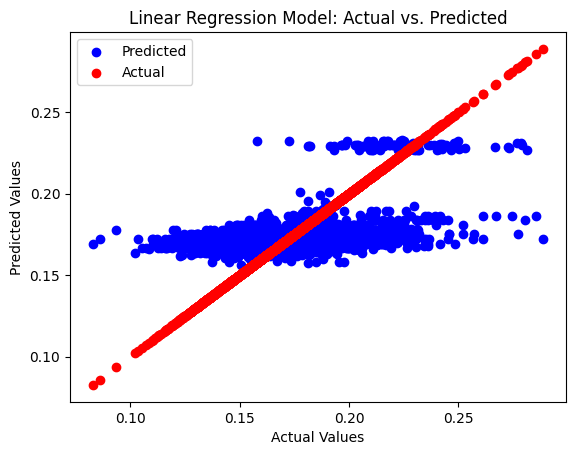

In [ ]:
# Plot the predicted values against the actual values
# Plotting the predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted')

# Plotting the actual values
plt.scatter(y_test, y_test, color='red', label='Actual')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model: Actual vs. Predicted')

plt.legend()
plt.show()


The features that were used were avaerage age , 'IP_Users', 'ER_Visits_Count' and the target was 'Hospital_Readmit_Rate%'and the performance of the Linear Regression model was analysed. Evaluation metrics were used  for predicting and evaluating accuracy and fit of the model and having a scatter plot helped in understanding the relation between actual values and the predicted values.  
 

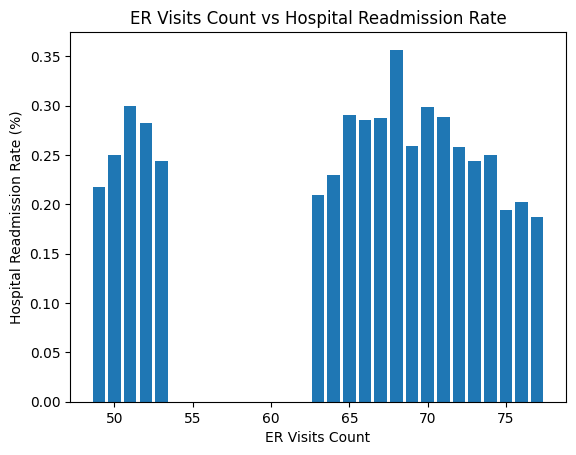

In [ ]:
# Create the bar plot
plt.bar(df['Average_Age'], df['Hospital_Readmit_Rate%'])

# Set the labels and title
plt.xlabel('ER Visits Count')
plt.ylabel('Hospital Readmission Rate (%)')
plt.title('ER Visits Count vs Hospital Readmission Rate')

# Display the plot
plt.show()

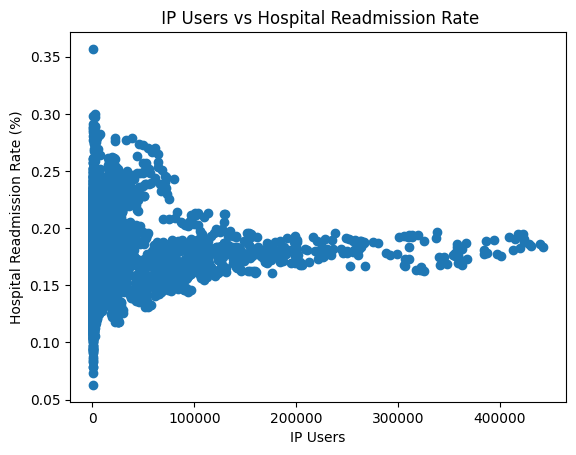

In [ ]:
# Scatter plot for 'IP_Users' vs 'Hospital_Readmit_Rate%'
plt.scatter(df['IP_Users'], df['Hospital_Readmit_Rate%'])
plt.xlabel('IP Users')
plt.ylabel('Hospital Readmission Rate (%)')
plt.title(' IP Users vs Hospital Readmission Rate')
plt.show()

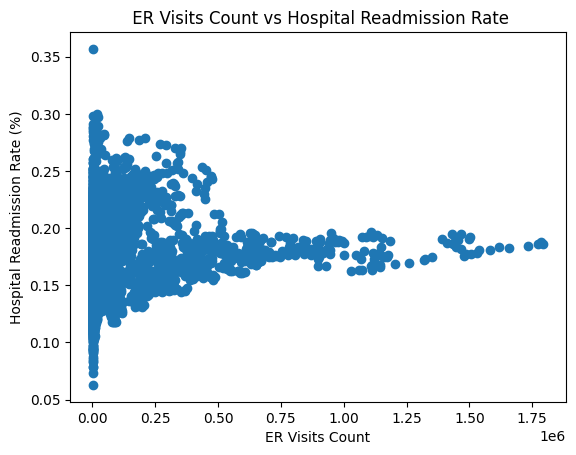

In [ ]:
# Scatter plot for 'ER_Visits_Count' vs 'Hospital_Readmit_Rate%'
plt.scatter(df['ER_Visits_Count'], df['Hospital_Readmit_Rate%'])
plt.xlabel('ER Visits Count')
plt.ylabel('Hospital Readmission Rate (%)')
plt.title(' ER Visits Count vs Hospital Readmission Rate')
plt.show()

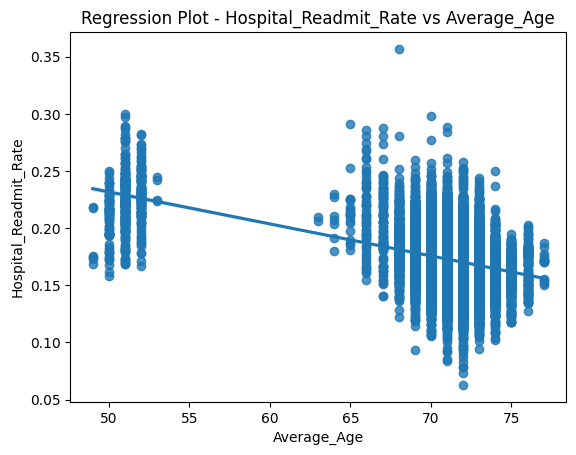

In [ ]:
sns.regplot(x='Average_Age', y='Hospital_Readmit_Rate%', data=df)

# Add labels and title
plt.xlabel('Average_Age')
plt.ylabel('Hospital_Readmit_Rate')
plt.title('Regression Plot - Hospital_Readmit_Rate vs Average_Age')

# Display the plot
plt.show()